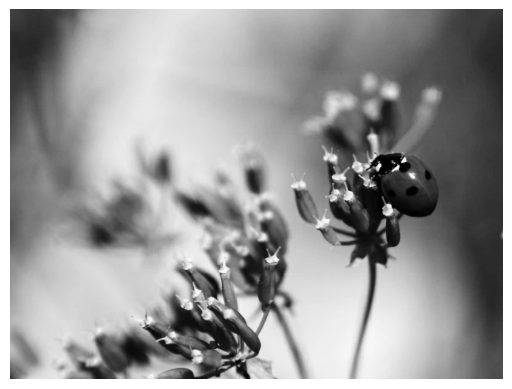

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

# Załadowanie obrazu
A = imread('4.webp')
X = np.mean(A,-1) # convert RGB to grayscale

# Pokazanie obrazu
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()


In [2]:
#SVD
U, S, VT = np.linalg.svd(X,full_matrices=False)

print("\n---------U---------\n")
print(U)
print("\n---------S---------\n")
print(S)
print("\n---------VT---------\n")
print(VT)


---------U---------

[[ 0.04246486  0.02647037  0.04576652 ... -0.10266961 -0.06829512
  -0.00959719]
 [ 0.04243974  0.02667179  0.0454259  ...  0.27718388  0.13059501
   0.0240936 ]
 [ 0.04241393  0.02687153  0.04511802 ... -0.25479413 -0.14123793
  -0.0436979 ]
 ...
 [ 0.04351011 -0.05806945  0.05096096 ... -0.00837429  0.02615645
  -0.04054143]
 [ 0.04358968 -0.05665683  0.05146187 ...  0.01558429 -0.02829799
   0.023056  ]
 [ 0.04363001 -0.05551785  0.0511997  ... -0.00629902  0.00917076
  -0.00324952]]

---------S---------

[1.04323662e+05 2.50347772e+04 1.09069272e+04 1.01497355e+04
 8.25480048e+03 7.88605980e+03 6.46145486e+03 5.36585612e+03
 5.14717467e+03 4.71949019e+03 4.23146680e+03 3.59774677e+03
 3.48220597e+03 3.30570844e+03 3.24266867e+03 3.18083310e+03
 3.04157032e+03 2.79010695e+03 2.63700923e+03 2.40783305e+03
 2.35777406e+03 2.18741870e+03 2.08792870e+03 2.02539496e+03
 1.86515164e+03 1.81151231e+03 1.72281158e+03 1.63002883e+03
 1.56185077e+03 1.49596560e+03 1.4493


-X^T X

[[7374441.11111112 7375612.88888889 7394842.22222222 ... 3308839.77777778
  3359188.55555556 3403905.11111111]
 [7375612.88888889 7378118.22222222 7398104.11111111 ... 3311311.11111111
  3362088.77777778 3407225.11111111]
 [7394842.22222222 7398104.11111111 7419611.66666667 ... 3324295.11111111
  3375619.77777778 3421243.88888889]
 ...
 [3308839.77777778 3311311.11111111 3324295.11111111 ... 1690652.
  1722830.88888889 1752838.44444444]
 [3359188.55555556 3362088.77777778 3375619.77777778 ... 1722830.88888889
  1764448.         1803344.55555556]
 [3403905.11111111 3407225.11111111 3421243.88888889 ... 1752838.44444444
  1803344.55555556 1851460.11111111]]

X^T X v2

[[7374441.11111135 7375612.888889   7394842.22222232 ... 3308839.77777783
  3359188.55555561 3403905.11111117]
 [7375612.888889   7378118.22222219 7398104.11111108 ... 3311311.11111109
  3362088.77777776 3407225.11111109]
 [7394842.22222232 7398104.11111108 7419611.66666662 ... 3324295.11111109
  3375619.77777776 3

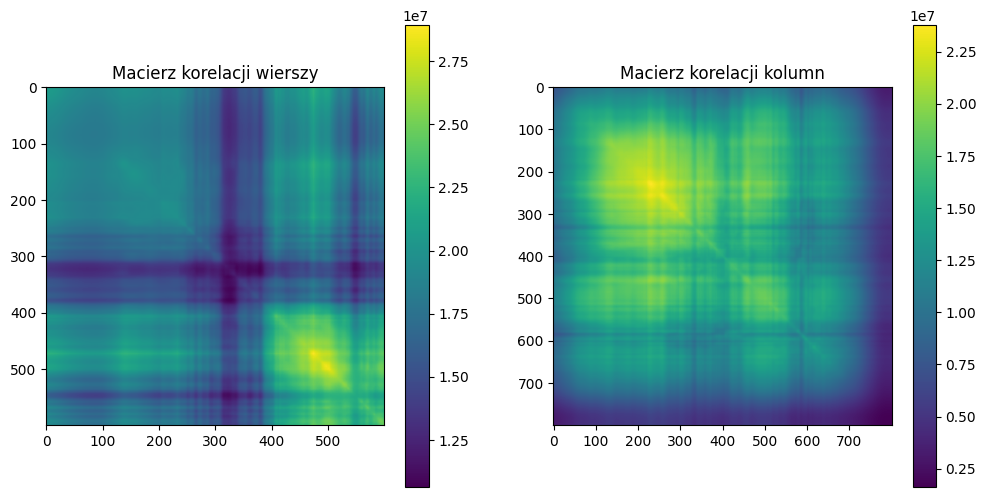

In [3]:
from numpy import diag

# Macierze korelacji

column_corr = X.T@X
column_corr2 = VT.T@diag(S)@diag(S)@VT
print("\n-X^T X\n")
print(column_corr)
print("\nX^T X v2\n")
print(column_corr2)
row_corr = X.dot(X.T)
row_corr2 = U@diag(S)@diag(S)@U.T
print("\nX X^T\n")
print(row_corr)
print("\nX X^T v2\n")
print(row_corr2)

# Check
print("\n\n")
print("Same in case of columns: " + str(np.allclose(column_corr, column_corr2)))
print("Same in case of rows: " + str(np.allclose(row_corr, row_corr2)))

# draw
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(row_corr, cmap='viridis')
plt.title('Macierz korelacji wierszy')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(column_corr, cmap='viridis')
plt.title('Macierz korelacji kolumn')
plt.colorbar()

plt.show()